In [7]:
## Bounding Boxes
import pixiedust
pixiedust.optOut()

Pixiedust will not collect anonymous install statistics.


In [8]:
from sunpy.net import hek
help(hek.attrs.FRM)

Help on FRM in module sunpy.net.hek.attrs object:

class FRM(builtins.object)
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  Contact = <sunpy.net.hek.attrs._StringParamAttrWrapper object>
 |  
 |  HumanFlag = <sunpy.net.hek.attrs._StringParamAttrWrapper object>
 |  
 |  Identifier = <sunpy.net.hek.attrs._StringParamAttrWrapper object>
 |  
 |  Institute = <sunpy.net.hek.attrs._StringParamAttrWrapper object>
 |  
 |  Name = <sunpy.net.hek.attrs._StringParamAttrWrapper object>
 |  
 |  ParamSet = <sunpy.net.hek.attrs._StringParamAttrWrapper object>
 |  
 |  SpecificID = <sunpy.net.hek.attrs._StringParamAttrWrapper object>
 |  
 |  URL = <sunpy.net.hek.attrs._StringParamAttrWrapper object>
 |  
 |  VersionNumber = <sunp

In [41]:
## Retrieving and plotting events

from sunpy.net import Fido
from sunpy.net import attrs as a
import pandas as pd

tstart = '2011/08/08 00:00:01'
tend = '2011/08/08 00:59:59'
frm_name = "SPoCA" #NOAA SWPC Observer
columns = [
        "frm_name",
        "obs_observatory",
        "obs_instrument",
        "ar_noaanum",
        "event_starttime",
        "event_endtime",
        "event_peaktime",
        "fl_goescls",
        "fl_peakflux",
    ]


frm_query = (a.hek.FRM.Name == "SPoCA")
#or a.hek.EventType('FL') or a.hek.EventType('CH') or a.hek.EventType('CH')
event_query = a.hek.EventType('AR') or a.hek.EventType('FL') or a.hek.EventType('CH')
result = Fido.search(a.Time(tstart, tend), event_query)
display(result)

<sunpy.net.fido_factory.UnifiedResponse object at 0x1354fdd30>
Results from 1 Provider:

26 Results from the HEKClient:
gs_thumburl ...
----------- ...
            ...
            ...
            ...
            ...
            ...
            ...
            ...
            ...
            ...
            ...
        ... ...
            ...
            ...
            ...
            ...
            ...
            ...
            ...
            ...
            ...
            ...
            ...
Length = 26 rows

- create a query for each day if the timestamp spans multiple days
- create a query for each event_type
- filter event for channelid == 171
- load different events

In [11]:
set([elem["frm_name"] for elem in result][0])

{'LMSAL forecaster 2 + SSW PFSS package', 'SPoCA'}

In [62]:
names = [name for name in result["hek"].colnames if len(result["hek"][name].shape) <= 1]
events_df = result["hek"][names].to_pandas()
events_df = events_df[events_df['search_channelid'].str.contains("171")]
display(events_df)

#events_df = result["hek"].to_pandas()
#events_df = events_df.astype({"event_peaktime": "datetime64[ns]"})
#events_df = events_df.set_index("event_peaktime")
#events_df = events_df.infer_objects()

In [13]:
!sdo-cli data download --path='./data/aia_171_bounding' --start='2011-08-08T01:30:04' --end='2011-08-08T12:30:04' --freq='1h' --wavelength='171' --metadata

Starting to download images...
loading data for 12 images between 2011-08-08 01:30:04 and 2011-08-08 12:30:04
writing metadata to /Users/mariusgiger/repos/master/sdo-cli/notebooks/data/aia_171_bounding/meta.csv


In [28]:
!sdo-cli data download --path='./data/aia_193_bounding' --start='2011-08-08T01:30:04' --end='2011-08-08T12:30:04' --freq='1h' --wavelength='193' --metadata

Starting to download images...
loading data for 12 images between 2011-08-08 01:30:04 and 2011-08-08 12:30:04
writing metadata to /Users/mariusgiger/repos/master/sdo-cli/notebooks/data/aia_193_bounding/meta.csv


In [14]:
"""
This is only to facilitate (and not necessary for) accessing the allowed constants.
Although for any methods in this project requiring objects of these types, one could
alter their arguments with 'str' instead, the classes below can be used to provide
options for each type, and prevent some mistakes.
"""


class AIA_WAVE:
    """
    The wavelength channel from which the image is captured. The physical units
    for this parameter is "Angstrom".
    """
    AIA_94 = "94"
    AIA_131 = "131"
    AIA_171 = "171"
    AIA_193 = "193"
    AIA_211 = "211"
    AIA_304 = "304"
    AIA_335 = "335"
    AIA_1600 = "1600"
    AIA_1700 = "1700"


class IMAGE_SIZE:
    """
    The available sizes in which the heatmaps of image parameters can be provided.
    """
    P2000 = "2k"
    P512 = "512"
    P128 = "256"


class IMAGE_PARAM:
    """
    The ids of the ten image parameters computed over each (4096 X 4096)-pixel image.
    """
    ENTROPY = '1'
    MEAN = '2'
    STD_DEVIATION = '3'
    FRACTAL_DIMENSION = '4'
    SKEWNESS = '5'
    KURTOSIS = '6'
    UNIFORMITY = '7'
    RELATIVE_SMOOTHNESS = '8'
    TAMURA_CONTRAST = '9'
    TAMURA_DIRECTIONALITY = '10'


class TABLE_NAME:
    """
    The table names in the database, each corresponding to one solar event type.
    """
    AR = 'ar'
    QH = 'qh'


class EVENT_TYPE:
    """
    The event types of the solar events. (More: https://www.lmsal.com/hek/VOEvent_Spec.html)
    """
    AR = 'ar'  # Active Region
    CH = 'ch'  # Coronal Hole
    CE = 'ce'  # Coronal Mass Ejection (CME)
    FI = 'fi'  # Filament
    FL = 'fl'  # Flare

    @staticmethod
    def convert(et):
        return {
            'ar': EVENT_TYPE.AR,
            'ch': EVENT_TYPE.CH,
            'ce': EVENT_TYPE.CE,
            'fi': EVENT_TYPE.FI,
            'fl': EVENT_TYPE.FL,
        }.get(et, 'ar')  # default is 'ar'


class PREDICATE:
    INTERSECT = 'intersects'


In [15]:
display(events_df.dtypes)

gs_thumburl               object
comment_count             object
hpc_bbox                  object
frm_humanflag             object
hgc_coord                 object
                           ...  
search_channelid          object
hgs_bbox                  object
area_unit                 object
obs_lastprocessingdate    object
refs                      object
Length: 132, dtype: object

In [16]:
from shapely.geometry.polygon import Polygon
from shapely.geometry.point import Point
from shapely import wkt
from datetime import datetime


class SpatioTemporalEvent:
    def __init__(self,
                 event_type: EVENT_TYPE,
                 start_time: datetime,
                 end_time: datetime,
                 hpc_coord: (Point, str),
                 hpc_bbox: (Polygon, str),
                 hpc_boundcc: (Polygon, str),
                 kb_archivid: str):
        """
        :param event_type: The event for which the results are returned.
        :param start_time: Start time of the event type.
        :param end_time: End Time of the event Type.
        :param hpc_coord: coordinates of the center of the bounding box.
        :param hpc_bbox: bounding box of the polygon.
        :param hpc_boundcc: polygon of the detected event (if present).
        :param kb_archivid: Unique id for each event type.
        """
        self.event_type: EVENT_TYPE = event_type
        self.start_time: datetime = start_time
        self.end_time: datetime = end_time
        self.hpc_coord: (Point, str) = hpc_coord
        self.hpc_bbox: (Polygon, str) = hpc_bbox
        if(hpc_boundcc):
            self.hpc_boundcc: (Polygon, str) = hpc_boundcc
        self.kb_archivid: str = kb_archivid

    @classmethod
    def from_dict(cls, instance: dict):
        obj = cls.__new__(cls)
        super(SpatioTemporalEvent, obj).__init__()
        obj.event_type = instance['eventtype']
        obj.start_time = instance['event_starttime']
        obj.end_time = instance['event_endtime']
        obj.hpc_coord = instance['hpc_coord']
        obj.hpc_bbox = instance['hpc_bbox']
        if instance['hpc_boundcc'] != '':
            obj.hpc_boundcc = instance['hpc_boundcc']
        else:
            obj.hpc_boundcc = None
        obj.kb_archivid = instance['kb_archivid']
        return obj


    @property
    def event_type(self):
        return self.__event_type

    @event_type.setter
    def event_type(self, event_type):
        if isinstance(event_type, EVENT_TYPE):
            self.__event_type = event_type
        elif isinstance(event_type, str):
            self.__event_type = EVENT_TYPE.convert(event_type)

    @property
    def start_time(self):
        return self.__start_time

    @start_time.setter
    def start_time(self, start_time):
        if isinstance(start_time, datetime):
            self.__start_time = start_time
        elif isinstance(start_time, str):
            self.__start_time = datetime.strptime(start_time, '%Y-%m-%dT%H:%M:%S')
        else:
            raise AttributeError

    @property
    def end_time(self):
        return self.__end_time

    @end_time.setter
    def end_time(self, end_time):
        if isinstance(end_time, datetime):
            self.__end_time = end_time
        elif isinstance(end_time, str):
            self.__end_time = datetime.strptime(end_time, '%Y-%m-%dT%H:%M:%S')
        else:
            raise AttributeError

    @property
    def hpc_coord(self):
        return self.__hpc_coord

    @hpc_coord.setter
    def hpc_coord(self, hpc_coord):
        if isinstance(hpc_coord, Point):
            self.__hpc_coord = hpc_coord
        elif isinstance(hpc_coord, str):
            self.__hpc_coord = wkt.loads(hpc_coord)
        else:
            raise AttributeError

    @property
    def hpc_bbox(self):
        return self.__hpc_bbox

    @hpc_bbox.setter
    def hpc_bbox(self, hpc_bbox):
        if isinstance(hpc_bbox, Polygon):
            self.__hpc_bbox = hpc_bbox
        elif isinstance(hpc_bbox, str):
            self.__hpc_bbox = wkt.loads(hpc_bbox)
        else:
            raise AttributeError

    @property
    def hpc_boundcc(self):
        return self.__hpc_boundcc

    @hpc_boundcc.setter
    def hpc_boundcc(self, hpc_boundcc):
        if hpc_boundcc is None:
            self.__hpc_boundcc = None
        if isinstance(hpc_boundcc, Polygon):
            self.__hpc_boundcc = hpc_boundcc
        elif isinstance(hpc_boundcc, str):
            self.__hpc_boundcc = wkt.loads(hpc_boundcc)
        else:
            #raise AttributeError
            self.__hpc_boundcc = None

    @property
    def kb_archivid(self):
        return self.__kb_archivid

    @kb_archivid.setter
    def kb_archivid(self, kb_archivid):
        self.__kb_archivid = kb_archivid

    def to_dict(self):
        dict = {'event_type': self.event_type,
                'start_time': self.start_time,
                'end_time': self.end_time,
                'hpc_coord': self.hpc_coord,
                'hpc_bbox': self.hpc_bbox,
                'hpc_boundcc': self.hpc_boundcc,
                'kb_archivid': self.kb_archivid
                }
        return dict


## Plot all events' regions over an AIA image

Using the bounding box (<code>hpc_bbox</code>) and chaincode (<code>hpc_boundcc</code>) information, and with the help of the header information we retrieved before (i.e., <code>CDELT</code>, <code>X0</code>, <code>Y0</code>), we can find the exact regions on AIA images. To do so, we first need to convert the coordinates from <i>arcsec</i> unit to <i>pixel</i> unit, and also account for the image size. Here, we are using images of size <code>2048X2048</code> while the original images are <code>4096X4096</code>. To properly resize the retreived spatial information, we should take into account this varaince. This is why we use <code>shrinkage_ratio = 2</code>.

```
points = polygon.exterior.coords
b = [(float(v[0]) / cdelt1 + crpix1, float(v[1]) / cdelt2 + crpix2) for v in points]
b = [(v[0] / shrinkage_ratio, (original_w - v[1]) / shrinkage_ratio) for v in b]
```

In [17]:
from shapely.geometry import Polygon


def convert_boundingpoints_to_pixelunit(polygon: Polygon, cdelt1, cdelt2, crpix1, crpix2, original_w, shrinkage_ratio = 1):
    """
    This method converts the points coordinates from arc-sec unit to pixel unit, and meanwhile
    makes 2 modifications:
        1. Vertical mirror of the points (this is required if JPG format is being used)
        2. Shrinkage of points (required if downsized images are being used.)

    :param polygon: a list of points forming a closed shape.
    :param cdelt1: fits/jp2 header information to scale in x direction
    :param cdelt2: fits/jp2 header information to scale in y direction
    :param crpix1: fits/jp2 header information to shift in x direction
    :param crpix2: fits/jp2 header information to shift in y direction
    :param original_w: the width of the original images. It is assumed that the images
    are in square shape, hence width and height are equal.
    :param shrinkage_ratio: a float point that indicates the ratio (original_w/new_size).
    For example, for 512 X 512 image, it should be 4.0.
    :return: a polygon object (from Shapely package) and None if the list was empty. If you need
            a list of tuples (x, y) instead, you can convert it using `poly = poly.exterior.coords'
    """
    points = polygon.exterior.coords
    b = [(float(v[0]) / cdelt1 + crpix1, float(v[1]) / cdelt2 + crpix2) for v in points]

    # Shrink and then mirror vertically
    b = [(v[0] / shrinkage_ratio, (original_w - v[1]) / shrinkage_ratio) for v in b]

    return Polygon(b)


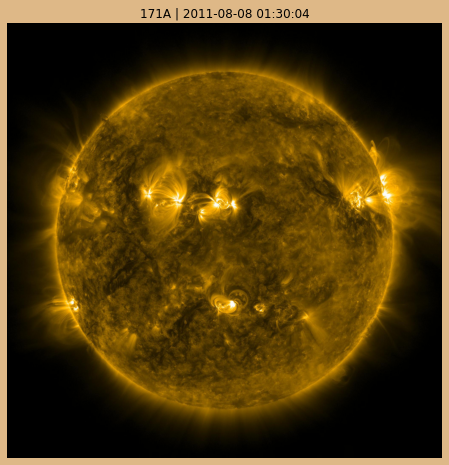

In [43]:
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt

aia_wave = "171"
dt = "2011-08-08 01:30:04"

img_path = "./data/aia_171_bounding/2011-08-08T013004__171.jpeg"
img = Image.open(img_path)

fig = plt.figure(figsize=(8, 8), facecolor='burlywood')
plt.axis('off')
plt.title('{}A | {}'.format(aia_wave, dt))
plt.imshow(img)

In [44]:
meta_path = "./data/aia_171_bounding/meta.csv"
meta_df = pd.read_csv(meta_path)
meta_df.head()

QUALITY          DSUN         X0      R_SUN         Y0  CDELT  \
0  1073741824  1.517054e+11  2049.1599  1579.6216  2049.1599    0.6   
1  1073741824  1.517136e+11  2049.1599  1579.5364  2049.1599    0.6   
2  1073741824  1.517211e+11  2049.1599  1579.4573  2049.1599    0.6   
3  1073741824  1.517276e+11  2049.1599  1579.3903  2049.1599    0.6   
4  1073741824  1.517324e+11  2049.1599  1579.3406  2049.1599    0.6   

                     FILE_NAME  
0  2011-08-08T013004__171.jpeg  
1  2011-08-08T023004__171.jpeg  
2  2011-08-08T033004__171.jpeg  
3  2011-08-08T043004__171.jpeg  
4  2011-08-08T053004__171.jpeg

In [45]:
header = meta_df[meta_df["FILE_NAME"]=="2011-08-08T013004__171.jpeg"].iloc[0]
header

QUALITY                       1073741824
DSUN                      151705360000.0
X0                             2049.1599
R_SUN                          1579.6216
Y0                             2049.1599
CDELT                                0.6
FILE_NAME    2011-08-08T013004__171.jpeg
Name: 0, dtype: object

In [46]:
import numpy as np
events_df['hpc_boundcc'].replace('', np.nan, inplace=True)
events_df.dropna(subset=['hpc_boundcc'], inplace=True)
events_df

gs_thumburl comment_count  \
0                          0   
1                          0   
2                          0   
3                          0   
4                          0   
5                          0   
6                          0   
7                          0   
8                          0   
9                          0   
10                         0   
11                         0   
12                         0   
13                         0   
14                         0   
15                         0   
16                         0   
17                         0   
18                         0   
19                         0   
20                         0   
21                         0   
22                         0   
23                         0   
24                         0   
25                         0   
26                         0   
27                         0   
28                         0   
29                         0   
30                         0   
31                         0   

                                             hpc_bbox frm_humanflag  \
0   POLYGON((-99.3 933.9,81.3 933.9,81.3 946.5,-99...         false   
1   POLYGON((186.9 -926.7,354.3 -926.7,354.3 -867....         false   
2   POLYGON((-80.7 -945.3,147.3 -945.3,147.3 -917....         false   
3   POLYGON((629.172 218.9556,662.598 222.6432,650...         false   
4   POLYGON((224.4888 -842.892,10.35594 -833.718,1...         false   
5   POLYGON((917.988 226.524,914.934 231.4128,904....         false   
6   POLYGON((10.59264 -938.922,10.59264 -938.922,5...         false   
7   POLYGON((324.381 -89.511,508.1238 -79.6764,501...         false   
8   POLYGON((543.774 121.773,559.3506 123.0192,554...         false   
9   POLYGON((483.0774 502.9212,319.5042 512.4396,2...         false   
10  POLYGON((391.5702 -501.9282,275.3832 -495.4806...         false   
11  POLYGON((214.4016 -915.96,214.3824 -914.172,23...         false   
12  POLYGON((495.3108 609.348,454.3104 612.75,433....         false   
13  POLYGON((266.3652 891.654,229.3518 915.468,49....         false   
14  POLYGON((531.8196 344.7576,455.7762 350.055,44...         false   
15  POLYGON((182.4564 -658.092,104.2332 -655.95,11...         false   
16  POLYGON((-81.8226 453.1494,-39.10038 452.7966,...         false   
17  POLYGON((224.1222 -916.62,226.6458 -914.712,26...         false   
18  POLYGON((-836.784 408.606,-849.66 402.0468,-75...         false   
19  POLYGON((262.605 344.5128,-108.7974 347.958,-9...         false   
20  POLYGON((-636.33 -311.1888,-695.952 -319.1136,...         false   
21  POLYGON((806.826 303.5868,780.42 308.6604,755....         false   
22  POLYGON((595.9572 632.25,575.3964 635.07,551.8...         false   
23  POLYGON((673.536 654.552,572.424 677.598,482.7...         false   
24  POLYGON((300.2298 -891.366,309.018 -889.782,32...         false   
25  POLYGON((-873.996 177.1548,-824.412 164.355,-8...         false   
26  POLYGON((414.3876 -849.552,428.0724 -842.49,47...         false   
27  POLYGON((-553.0308 -694.026,-284.0394 -718.554...         false   
28  POLYGON((307.4994 -815.808,437.6574 -802.002,5...         false   
29  POLYGON((221.799 -603.9,465.2532 -590.568,557....         false   
30  POLYGON((-156.7284 -923.586,-157.4748 -924.21,...         false   
31  POLYGON((594.8568 734.928,584.847 740.172,501....         false   

                        hgc_coord event_coordsys obs_levelnum  \
0    POINT(-153.658028 88.252932)   UTC-HPC-TOPO          1.5   
1    POINT(-66.128141 -67.348124)   UTC-HPC-TOPO          1.5   
2   POINT(-100.822353 -74.647983)   UTC-HPC-TOPO          1.5   
3          POINT(-70.491 19.2646)   UTC-HGC-TOPO         None   
4         POINT(42.4232 -61.0125)   UTC-HGC-TOPO         None   
5          POINT(-22.586 14.8992)   UTC-HGC-TOPO         None   
6        POINT(-169.835 -73.1481)   UTC-HGC-TOPO         None   
7          POINT(-90.951 5.95214)   UTC-HGC-TOPO         None   
8          POINT(

In [58]:
all_polygons = []
all_bboxes = []

for i, event in events_df.iterrows():
    ste = SpatioTemporalEvent.from_dict(event)
    
    if(ste.hpc_boundcc is not None):
        poly_converted = convert_boundingpoints_to_pixelunit(polygon = ste.hpc_boundcc,
                                                         cdelt1 = header['CDELT'],
                                                         cdelt2 = header['CDELT'],
                                                         crpix1 = header['X0'],
                                                         crpix2 = header['Y0'],
                                                         original_w = 4096,
                                                         shrinkage_ratio = 2)
        all_polygons.append(poly_converted)

    bbox_converted = convert_boundingpoints_to_pixelunit(polygon = ste.hpc_bbox,
                                                         cdelt1 = header['CDELT'],
                                                         cdelt2 = header['CDELT'],
                                                         crpix1 = header['X0'],
                                                         crpix2 = header['Y0'],
                                                         original_w = 4096,
                                                         shrinkage_ratio = 2)
    
    all_bboxes.append(bbox_converted)

In [59]:
len(all_bboxes)

14

In [60]:
len(all_polygons)

14

In [61]:
plt.clf()
img = Image.open(img_path)
img = img.convert('RGB')
img_draw = ImageDraw.Draw(img)

fig = plt.figure(figsize=(15, 15), facecolor='burlywood')

for poly in all_polygons:
    poly = poly.exterior.coords
    img_draw.line(poly, fill="red", width=3)
    for point in poly:
        img_draw.ellipse((point[0] - 2, point[1] - 2, point[0] + 2, point[1] + 2), fill="red")

for bbox in all_bboxes:
    bbox = bbox.exterior.coords
    img_draw.line(bbox, fill="blue", width=3)
    for point in bbox:
        img_draw.ellipse((point[0] - 2, point[1] - 2, point[0] + 2, point[1] + 2), fill="blue")
        
plt.axis('off')
plt.title('{}A | {}'.format(aia_wave, dt))
plt.imshow(img)

<Figure size 432x288 with 0 Axes>

In [222]:
!sdo-cli data resize --path='./data/aia_171_bounding' --targetpath='./data/aia_171_bounding_256/train' --wavelength='171' --size=256

Starting to generate resized images...
converting 12 images


In [63]:
!python ../src/sood/algorithms/ce_vae.py \
    --run="predict" \
    --data-dir="./data/aia_171_bounding_256" \
    --test-dir="./data/aia_171_bounding_256" \
    -o "./output/aia_171_bounding_pred" \
    --load-path="/Users/mariusgiger/Downloads/20210525-070039_cevae_128_quiet/checkpoint" \
    --ce-factor 0 \
    --logger="file" \
    --z-dim 128 \
    --target-size 256 \
    --score-mode combi \
    --mode="pixel"

VAE(
  (enc): BasicEncoder(
    (start): ConvModule(
      (conv): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (activation): LeakyReLU(negative_slope=0.01)
    )
    (middle_blocks): ModuleList(
      (0): NoOp()
      (1): ConvModule(
        (conv): Conv2d(16, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (activation): LeakyReLU(negative_slope=0.01)
      )
      (2): NoOp()
      (3): ConvModule(
        (conv): Conv2d(64, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (activation): LeakyReLU(negative_slope=0.01)
      )
      (4): NoOp()
      (5): ConvModule(
        (conv): Conv2d(256, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (activation): LeakyReLU(negative_slope=0.01)
      )
    )
    (end): ConvModule(
      (conv): Conv2d(1024, 256, kernel_size=[16, 16], stride=(1, 1), bias=False)
    )
  )
  (dec): BasicGenerator(
    (start): ConvModule(
    

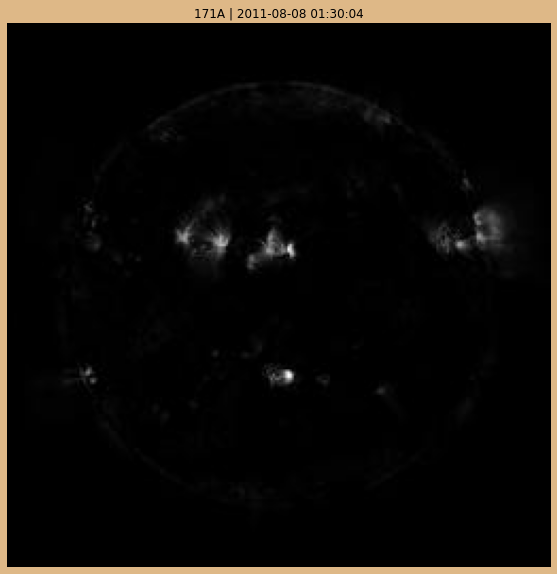

In [64]:
import numpy as np
pred_path = "./output/aia_171_bounding_pred/20210803-173219_cevae/predictions/2011-08-08T013004__171.jpeg"
pred_img = Image.open(pred_path).convert("L")
pred_img_arr = np.asarray(pred_img)
plt.figure(figsize = (10,10), facecolor='burlywood')
plt.axis('off')
plt.title('{}A | {}'.format(aia_wave, dt))
plt.imshow(pred_img_arr, cmap='gray', vmin=0, vmax=255)

In [91]:
mask_threshold = 20

mask_img = pred_img_arr > mask_threshold
inverted_pred_img_arr = np.zeros_like(pred_img_arr)
inverted_pred_img_arr[mask_img] = pred_img_arr[mask_img]

mask_img = Image.fromarray(np.invert(inverted_pred_img_arr))
plt.figure(figsize = (10,10), facecolor='burlywood')
plt.axis('off')
plt.title('{}A | {}'.format(aia_wave, dt))
plt.imshow(mask_img, cmap='gray', vmin=0, vmax=255)

In [68]:
src_img_path = './data/aia_171_bounding_256/train/2011-08-08T013004__171.jpeg'
src_img = Image.open(src_img_path).convert("L")
src_img_arr = np.asarray(src_img)
plt.figure(figsize = (10,10), facecolor='burlywood')
plt.axis('off')
plt.title('{}A | {}'.format(aia_wave, dt))
plt.imshow(src_img_arr, cmap='gray', vmin=0, vmax=255)

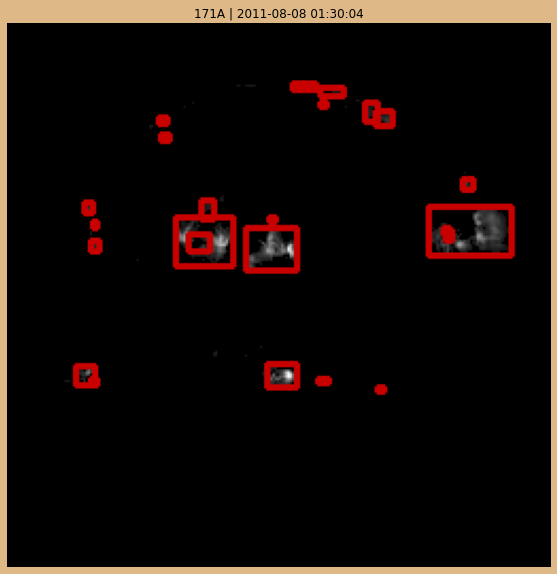

In [92]:
import cv2
im = cv2.cvtColor(inverted_pred_img_arr, cv2.COLOR_RGB2BGR)
src_im = cv2.cvtColor(src_img_arr, cv2.COLOR_RGB2BGR)
#orig_im = cv2.cvtColor(orig_img_arr, cv2.COLOR_RGB2BGR)

contours, hierarchy = cv2.findContours(
    inverted_pred_img_arr, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_KCOS)

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if(w < 2 or h < 2):
        continue

    cv2.rectangle(im, (x, y), (x+w, y+h), (0, 0, 200), 2)
    cv2.rectangle(src_im, (x, y), (x+w, y+h), (200, 0, 0), 2)

    scale = 8
    x_scaled = x * scale
    y_scaled = y * scale
    w_scaled = w * scale
    h_scaled = h * scale

    #cv2.rectangle(orig_im, (x_scaled, y_scaled), (x_scaled+w_scaled, y_scaled+h_scaled), (200, 0, 0), 5)

img2 = im[:, :, ::-1]
plt.figure(figsize=(10, 10), facecolor='burlywood')
plt.axis('off')
plt.title('{}A | {}'.format(aia_wave, dt))
plt.imshow(img2)

In [149]:
def convertContoursToPolygons(contours, scale=1, min_width=3, min_height=3, max_width=48, max_height=48):
    polygons = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if(w < min_width or h < min_height or w > max_width or h > max_height):
            continue
    
        x = x * scale
        y = y * scale
        w = w * scale
        h = h * scale
        
        polygon = Polygon([(x,y), (x+w, y), (x+w, y+h), (x, y+h)])
        polygons.append(polygon)
        
    return polygons

model_polygons = convertContoursToPolygons(contours)

<Figure size 432x288 with 0 Axes>

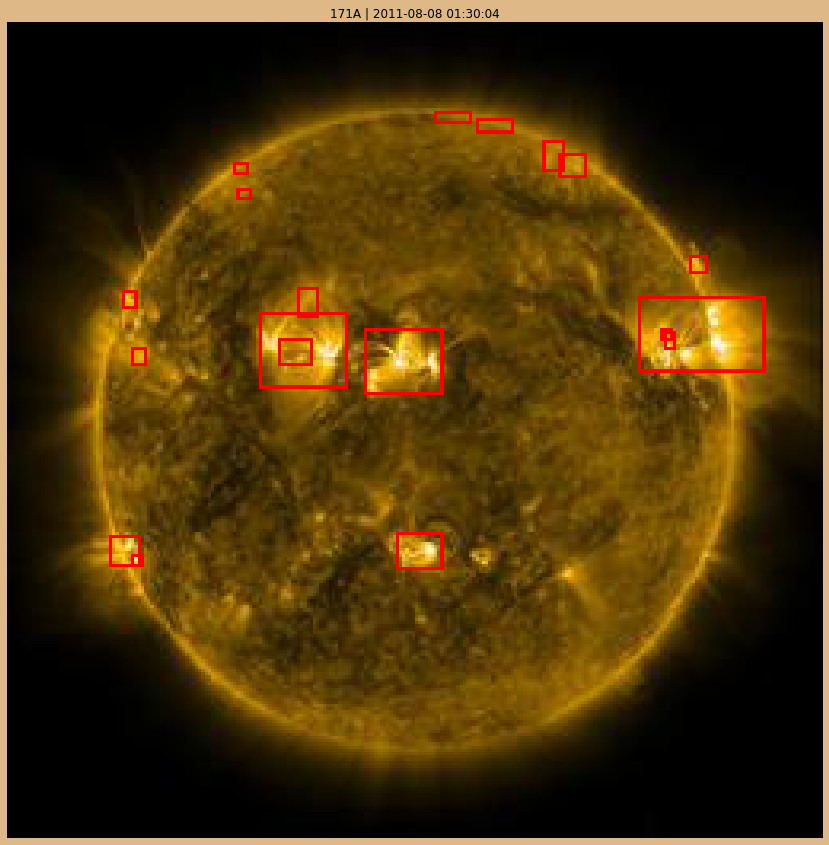

In [150]:
plt.clf()
img = Image.open(src_img_path)
img = img.convert('RGB')
img_draw = ImageDraw.Draw(img)

fig = plt.figure(figsize=(15, 15), facecolor='burlywood')

for poly in model_polygons:
    poly = poly.exterior.coords
    img_draw.line(poly, fill="red", width=1)
    #for point in poly:
        #img_draw.ellipse((point[0] - 2, point[1] - 2, point[0] + 2, point[1] + 2), fill="red")

plt.axis('off')
plt.title('{}A | {}'.format(aia_wave, dt))
plt.imshow(img)

<Figure size 432x288 with 0 Axes>

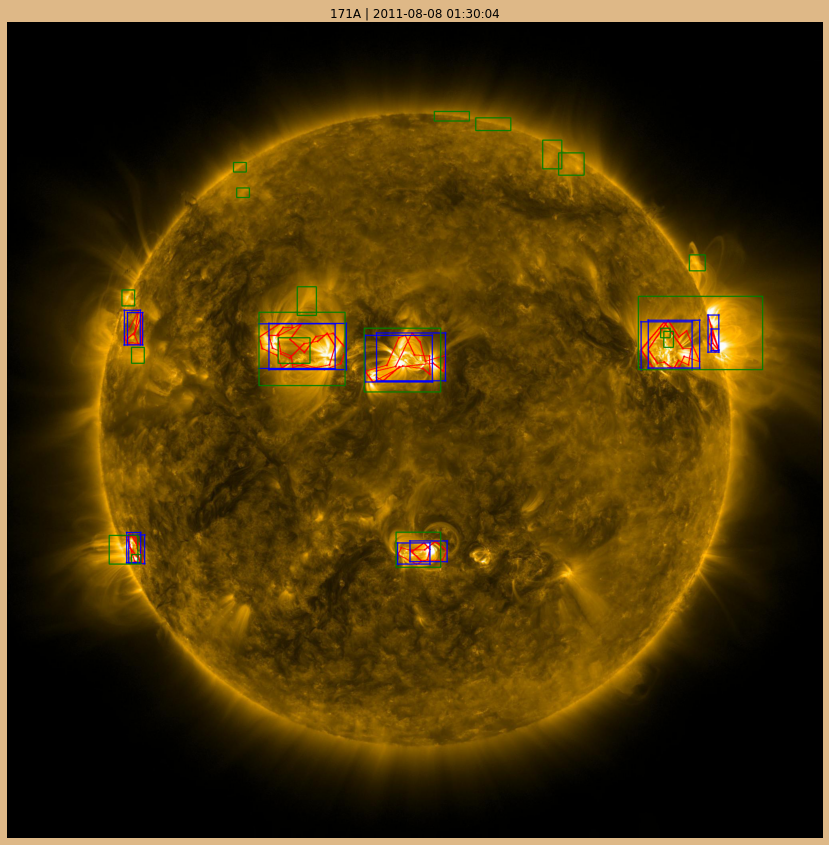

In [151]:
plt.clf()
img = Image.open(img_path)
img = img.convert('RGB')
img_draw = ImageDraw.Draw(img)

fig = plt.figure(figsize=(15, 15), facecolor='burlywood')

for poly in all_polygons:
    poly = poly.exterior.coords
    img_draw.line(poly, fill="red", width=3)
    for point in poly:
        img_draw.ellipse((point[0] - 2, point[1] - 2, point[0] + 2, point[1] + 2), fill="red")

for bbox in all_bboxes:
    bbox = bbox.exterior.coords
    img_draw.line(bbox, fill="blue", width=3)
    for point in bbox:
        img_draw.ellipse((point[0] - 2, point[1] - 2, point[0] + 2, point[1] + 2), fill="blue")

scaled_model_polygons = convertContoursToPolygons(contours, scale=8)
for poly in scaled_model_polygons:
    poly = poly.exterior.coords
    img_draw.line(poly, fill="green", width=3)
    
plt.axis('off')
plt.title('{}A | {}'.format(aia_wave, dt))
plt.imshow(img)

In [152]:
from shapely.ops import unary_union

ground_union = unary_union(all_bboxes)
ground_union

In [153]:
len(scaled_model_polygons)

19

In [154]:
pred_union = unary_union(scaled_model_polygons)
pred_union

In [155]:
resulting_intersection = ground_union.intersection(pred_union)
resulting_intersection

In [156]:
# Calculate Intersection and union, and IOU
resulting_intersection_area = resulting_intersection.area
resulting_union_area = ground_union.union(pred_union).area
IOU = resulting_intersection_area / resulting_union_area 
IOU

0.4462045849460551

In [134]:
n_intersections = 0
n_ground_truth_polygons = len(all_polygons)
n_found_polygons = len(scaled_model_polygons)

for ground_poly in all_polygons:
    for found_poly in scaled_model_polygons:
        if ground_poly.intersects(found_poly):
            n_intersections = n_intersections + 1
            
print(n_intersections)

22


In [120]:
accuracy = n_intersections / n_ground_truth_polygons
accuracy

1.5714285714285714

https://stackoverflow.com/questions/57965493/how-to-convert-numpy-arrays-obtained-from-cv2-findcontours-to-shapely-polygons

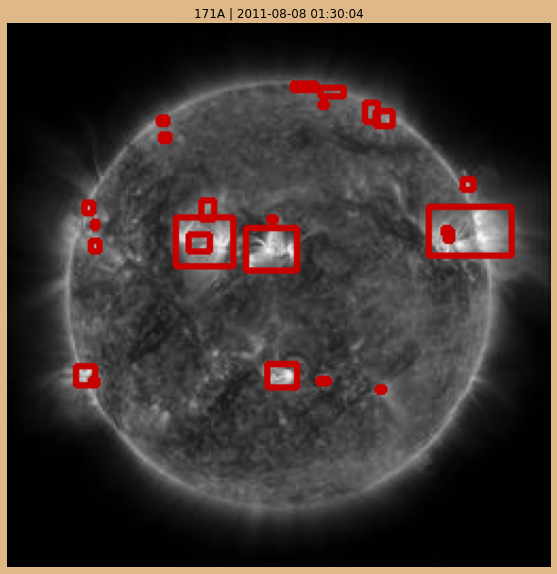

In [80]:
plt.figure(figsize = (10,10), facecolor='burlywood')
plt.axis('off')
plt.title('{}A | {}'.format(aia_wave, dt))
plt.imshow(src_im)

<Figure size 432x288 with 0 Axes>

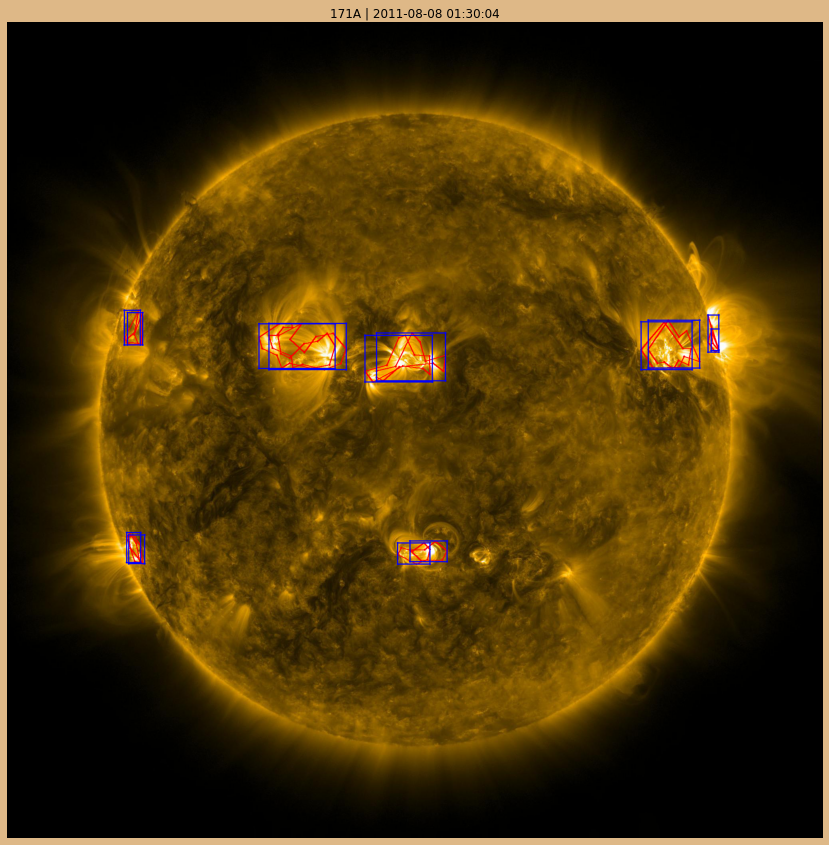

In [81]:
plt.clf()
img = Image.open(img_path)
img = img.convert('RGB')
img_draw = ImageDraw.Draw(img)

fig = plt.figure(figsize=(15, 15), facecolor='burlywood')

for poly in all_polygons:
    poly = poly.exterior.coords
    img_draw.line(poly, fill="red", width=3)
    for point in poly:
        img_draw.ellipse((point[0] - 2, point[1] - 2, point[0] + 2, point[1] + 2), fill="red")

for bbox in all_bboxes:
    bbox = bbox.exterior.coords
    img_draw.line(bbox, fill="blue", width=3)
    for point in bbox:
        img_draw.ellipse((point[0] - 2, point[1] - 2, point[0] + 2, point[1] + 2), fill="blue")
        
plt.axis('off')
plt.title('{}A | {}'.format(aia_wave, dt))
plt.imshow(img)

In [82]:
mask_threshold = 0

mask_img = pred_img_arr > mask_threshold
inverted_pred_img_arr = np.zeros_like(pred_img_arr)
inverted_pred_img_arr[mask_img] = pred_img_arr[mask_img]

mask_img = Image.fromarray(np.invert(inverted_pred_img_arr))
plt.figure(figsize = (10,10), facecolor='burlywood')
plt.axis('off')
plt.title('{}A | {}'.format(aia_wave, dt))
plt.imshow(mask_img, cmap='gray', vmin=0, vmax=255)

- https://github.com/HELIO-HFC/SPoCA
- https://bitbucket.org/gsudmlab/hek-processor/src/master/src/main/java/edu/gsu/cs/dmlab/tasks/FetchAndSaveEventsTask.java
- https://www.lmsal.com/hek/her?cmd=view-voevent&ivorn=ivo%3A%2F%2Fhelio-informatics.org%2FFL_SECstandard_20140108_063526_20140107180400
- https://bitbucket.org/gsudmlab/dmlablib/src/v0.0.4/db-connectors/src/main/java/edu/gsu/cs/dmlab/datasources/HekISDEventDataSource.java
- https://dokk.org/documentation/sunpy/v0.8.4/guide/acquiring_data/hek/


- https://matplotlib.org/stable/gallery/color/named_colors.html

- polygons need to be rescaled to the correct size (depending on the model output)
- polygons need to be rotated according to the time the picture was taken, because event time and picture time might be different

Evaluation:

- http://medicalood.dkfz.de/web/

The processes around hek are only badly described, the data quality of the labels is therefore hard do assess.

For active regions HMI Sharp

Using OR in the query language is not possible a.hek.EventType('FL') or a.hek.EventType('CH')
somehow does not return the correct result

alternative way of calculation, rather than using bounding boxes, color a grid on the sun, with either anomalous or non anomalous, based on the anomaly score, then match this grid against the ground truth

https://towardsdatascience.com/intersection-over-union-iou-calculation-for-evaluating-an-image-segmentation-model-8b22e2e84686